<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/main/fyp_wpf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install -q dash
# !pip install  jupyter-dash
# !pip install -q dash_core_components
# !pip install -q dash_html_components
# !pip install -q dash_table
# !pip install pyngrok --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from google.colab import files
import io

import plotly.express as px
import plotly.graph_objects as go

''' import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 
 '''

' import dash\nimport dash_core_components as dcc\nimport dash_html_components as html\nfrom dash.dependencies import Input, Output \n '

In [2]:
data = files.upload()

Saving S6 10 seconed data (1).csv to S6 10 seconed data (1).csv


In [3]:
df = pd.read_csv(io.StringIO(data['S6 10 seconed data (1).csv'].decode('utf-8')))


In [ ]:
df

In [4]:
df = df.drop([0])

df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df["Active Power kW"] = pd.to_numeric(df["Active Power kW"], downcast="float")
df["Wind Speed m/s"] = pd.to_numeric(df["Wind Speed m/s"], downcast="float")

def hr_func(ts):
    return ts.hour
    
df["Hour"] = pd.to_numeric(df['Date & Time'].apply(hr_func), downcast="float")
df

,Date & Time,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE,Hour
1,2021-06-24 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.799988,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4,0.0
2,2021-06-24 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.500000,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6,0.0
3,2021-06-24 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.700012,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7,0.0
4,2021-06-24 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.099976,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7,0.0
5,2021-06-24 00:00:40,50.31,593.3,585.5,589.4,421.5,421.2,430.8,10.5,744.000000,3.8,1529.8,180,31.5,34.2,70,79.6,139.2,133.6,137.3,53.7,43.8,74.3,72.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,2021-06-24 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.200012,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4,23.0
8637,2021-06-24 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.299988,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2,23.0
8638,2021-06-24 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.299988,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3,23.0
8639,2021-06-24 23:59:40,50.1,582.5,577.5,576.7,270.7,272.2,268,8.4,465.700012,-0.8,1512.8,177.4,30.9,32.2,61.4,73.6,95.2,90.7,94.9,53.7,43.6,62,65.3,23.0


**Array of Active Power kW**




In [5]:
active_power=df['Active Power kW']
active_power=np.array(active_power)
active_power=pd.DataFrame(active_power)
active_power=active_power[0:1000]
active_power
#active_power.head()
#active_power.shape

,0
0,737.799988
1,745.500000
2,732.700012
3,743.099976
4,744.000000
...,...
995,495.200012
996,443.000000
997,561.799988
998,655.599976


**Graph of time vs Active_power**

In [6]:
fig = px.line(df, x="Date & Time" , y="Generator RPM") 
fig.show()

***Statistics of Data***




In [7]:
active_power.describe()

,0
count,1000.000000
mean,710.432861
std,57.736431
min,443.000000
25%,705.999985
50%,729.349976
75%,743.099976
max,798.400024


**Trainind and testing data set and their statistics**

In [8]:
train,test=active_power[:-100],active_power[-100:]  #seperate train and test data arrays
print(train.shape)
print(test.shape)

print(train.describe())
print(test.describe())

(900, 1)
(100, 1)
                0
count  900.000000
mean   716.432068
std     51.363483
min    448.600006
25%    714.074982
50%    730.900024
75%    744.200012
max    798.400024
                0
count  100.000000
mean   656.440002
std     80.056442
min    443.000000
25%    598.075012
50%    672.500000
75%    727.775009
max    791.200012


**Autocorrelation**

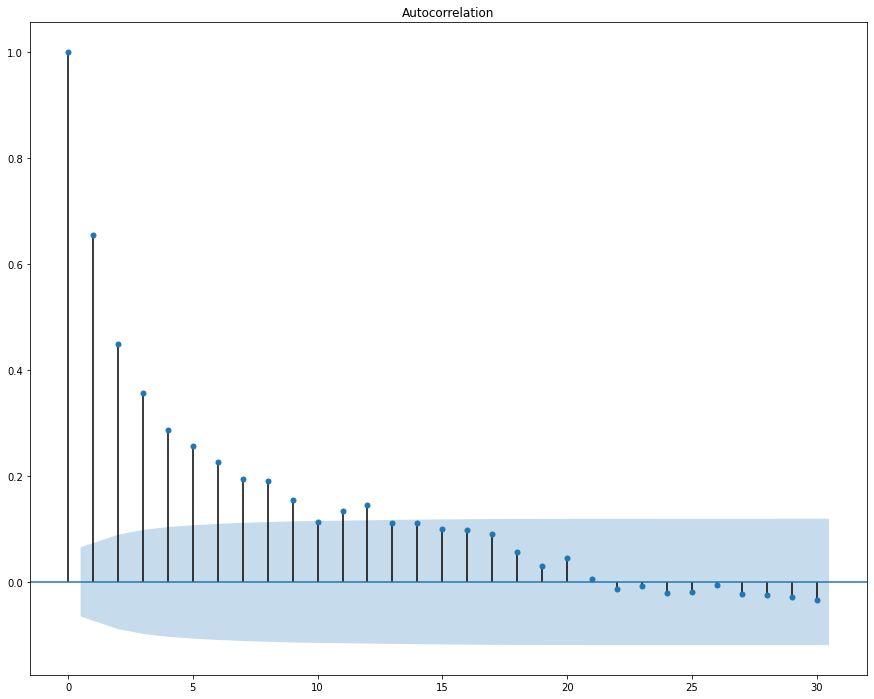

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
pyplot=plot_acf(train)
pyplot.set_size_inches(15,12)
pyplot.show()

**Trends,Seasons and Noise of the time series data**

<Figure size 432x288 with 0 Axes>

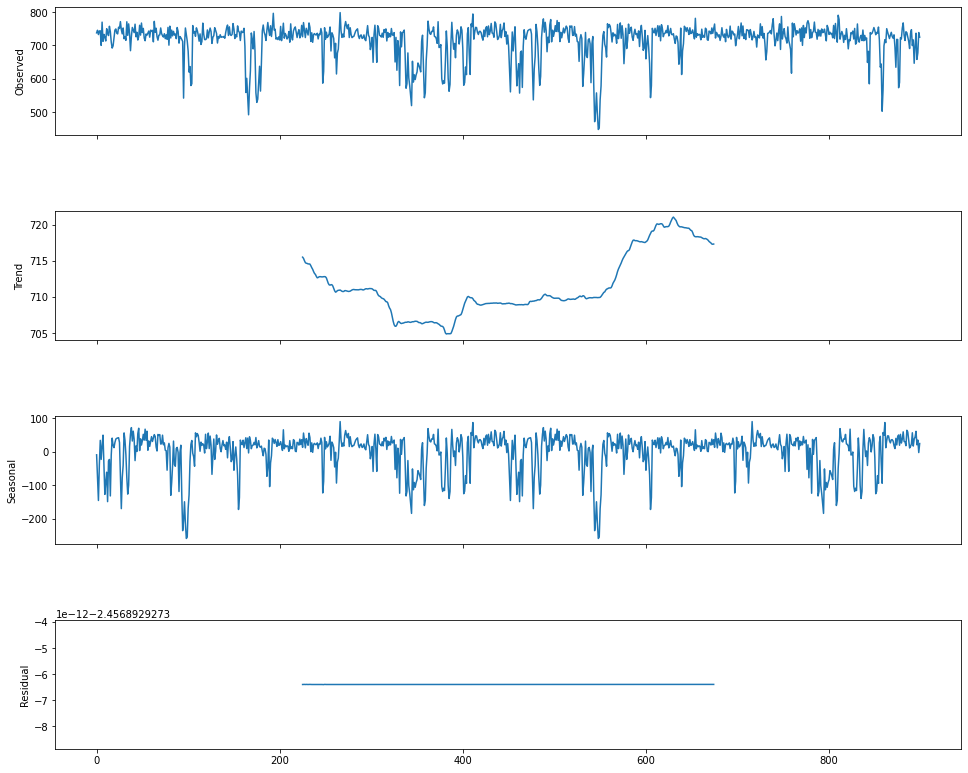

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='additive',freq=450)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,12)